In [1]:
import mindscope_utilities

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

t = np.arange(0,110,0.001)

f = 3.2
noise_sigma = 2
data = pd.DataFrame({
    'time': t,
    'response': np.sin(2*np.pi*f*t) + noise_sigma*np.random.randn(len(t))
})


def downsample(input_df, sampling_frequency):
    from scipy.interpolate import interp1d
    sample_times = np.arange(input_df['time'].min(), input_df['time'].max(), 1/sampling_frequency)
    f = interp1d(input_df['time'], input_df['response'])
    return pd.DataFrame({'time': sample_times, 'response': f(sample_times)})

downsampled_data = downsample(data, sampling_frequency=30)

events = np.arange(1,100, 1/f)
etr = mindscope_utilities.event_triggered_response(
    downsampled_data,
    t = 'time',
    y = 'response',
    event_times = events,
    t_before = 0,
    t_after = 0.75,
    output_sampling_rate = 30,
    output_format='tidy'
)

In [2]:
etr['time'].unique()

array([0.        , 0.03333333, 0.06666667, 0.1       , 0.13333333,
       0.16666667, 0.2       , 0.23333333, 0.26666667, 0.3       ,
       0.33333333, 0.36666667, 0.4       , 0.43333333, 0.46666667,
       0.5       , 0.53333333, 0.56666667, 0.6       , 0.63333333,
       0.66666667, 0.7       , 0.73333333])

In [9]:
include_endpoint=True
output_sampling_rate=30
step_size = 1/output_sampling_rate
t_before = 0.1
t_after = 0.1
    
np.linspace(
-t_before,
t_after,
int((t_before + t_after) / step_size + int(include_endpoint)),
endpoint=include_endpoint
)

array([-0.1       , -0.06666667, -0.03333333,  0.        ,  0.03333333,
        0.06666667,  0.1       ])

In [25]:
int((t_before + t_after) / step_size + int(include_endpoint)) == (t_before + t_after) / step_size + int(include_endpoint)

True

In [46]:
include_endpoint=True
output_sampling_rate=30
step_size = 1/output_sampling_rate
t_before = 1
t_after = 0.75

t_array = np.arange(-t_before, t_after + int(include_endpoint)*step_size, step_size)
t_array = t_array[np.where(t_array <= t_after)]
t_array_l = np.linspace(-t_before, t_after, len(t_array))
t_array_l

array([-1.        , -0.96634615, -0.93269231, -0.89903846, -0.86538462,
       -0.83173077, -0.79807692, -0.76442308, -0.73076923, -0.69711538,
       -0.66346154, -0.62980769, -0.59615385, -0.5625    , -0.52884615,
       -0.49519231, -0.46153846, -0.42788462, -0.39423077, -0.36057692,
       -0.32692308, -0.29326923, -0.25961538, -0.22596154, -0.19230769,
       -0.15865385, -0.125     , -0.09134615, -0.05769231, -0.02403846,
        0.00961538,  0.04326923,  0.07692308,  0.11057692,  0.14423077,
        0.17788462,  0.21153846,  0.24519231,  0.27884615,  0.3125    ,
        0.34615385,  0.37980769,  0.41346154,  0.44711538,  0.48076923,
        0.51442308,  0.54807692,  0.58173077,  0.61538462,  0.64903846,
        0.68269231,  0.71634615,  0.75      ])

In [102]:
include_endpoint=True
output_sampling_rate=30
step_size = 1/output_sampling_rate
t_before = 1
t_after = 1

n_steps = (t_before + t_after) / step_size
if n_steps != int(n_steps):
    # if the number of steps isn't an int, we need to round down and include the endpoint
    n_steps = int(n_steps)
    t_end = -1*t_before + n_steps*step_size
    include_endpoint = True
else:
    t_end = t_after
    
if include_endpoint:
    # add an extra step if including endpoint
    n_steps += 1
    
np.linspace(-t_before, t_end, int(n_steps), endpoint=include_endpoint)

array([-1.        , -0.96666667, -0.93333333, -0.9       , -0.86666667,
       -0.83333333, -0.8       , -0.76666667, -0.73333333, -0.7       ,
       -0.66666667, -0.63333333, -0.6       , -0.56666667, -0.53333333,
       -0.5       , -0.46666667, -0.43333333, -0.4       , -0.36666667,
       -0.33333333, -0.3       , -0.26666667, -0.23333333, -0.2       ,
       -0.16666667, -0.13333333, -0.1       , -0.06666667, -0.03333333,
        0.        ,  0.03333333,  0.06666667,  0.1       ,  0.13333333,
        0.16666667,  0.2       ,  0.23333333,  0.26666667,  0.3       ,
        0.33333333,  0.36666667,  0.4       ,  0.43333333,  0.46666667,
        0.5       ,  0.53333333,  0.56666667,  0.6       ,  0.63333333,
        0.66666667,  0.7       ,  0.73333333,  0.76666667,  0.8       ,
        0.83333333,  0.86666667,  0.9       ,  0.93333333,  0.96666667,
        1.        ])

In [95]:
-1*t_before + n_steps*step_size

0.7333333333333333

In [86]:
n_steps

30.0

In [28]:
n_steps=23
np.linspace(-t_before,0.73333333,n_steps,endpoint=include_endpoint)

array([0.        , 0.03333333, 0.06666667, 0.1       , 0.13333333,
       0.16666667, 0.2       , 0.23333333, 0.26666667, 0.3       ,
       0.33333333, 0.36666667, 0.4       , 0.43333333, 0.46666666,
       0.5       , 0.53333333, 0.56666666, 0.6       , 0.63333333,
       0.66666666, 0.7       , 0.73333333])

In [39]:
((t_before + t_after) / step_size) * step_size

0.75

In [49]:
t = np.arange(-10,110,0.01)

# Make a dataframe with one column as time, and another column called 'sinusoid' defined as sin(2*pi*t)
# The sinusoid column will have a period of 1
df = pd.DataFrame({
    'time': t,
    'sinusoid': np.sin(2*np.pi*t)
})
df_copy = df.copy(deep=True)

# Make an event triggered response 
etr = mindscope_utilities.event_triggered_response(
    data = df,
    t = 'time',
    y = 'sinusoid',
    event_times = np.arange(100),
    t_before = 1,
    t_after = 1,
    output_sampling_rate = 100,
)

# Assert that the average value of the agrees with expectations
assert np.isclose(etr.query('time == 0')['sinusoid'].mean(), 0, rtol=0.01)
assert np.isclose(etr.query('time == 0.25')['sinusoid'].mean(), 1, rtol=0.01)
assert np.isclose(etr.query('time == 0.5')['sinusoid'].mean(), 0, rtol=0.01)
assert np.isclose(etr.query('time == 0.75')['sinusoid'].mean(), -1, rtol=0.01)
assert np.isclose(etr.query('time == 1')['sinusoid'].mean(), 0, rtol=0.01)

In [51]:
etr.query('time == 0')['sinusoid'].mean()

-1.775605972517515e-14

In [1]:
import mindscope_utilities

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# Measuring event triggered responses
In sensory neuroscience, we often want to ask whether a given neuron shows a consistent response to a given stimulus or behavioral event. One way to do this to simply calculate the average response of that neuron in a short time window surrounding the time of each repitition of a given event. These are referred to as (among other names) 'event triggered responses' or 'event triggered averages'

As an example, let's generate a sinusoid function, but corrupt it with Gaussian noise. Then we'll use a convenience function to calculate the event triggered average at regular intervals, demonstrating that the sinusoid can be partially recovered from the noise.

First, define a time vector from 0 to 110 seconds at 1000 Hz

In [64]:
t = np.arange(0,110,0.001)

Now build a dataframe with one column for time,
and another column that is a sinuosoid with frequency of 3.2 Hz and corrupted with gaussian noise with a standard deviation of 2

In [80]:
f = 3.2
noise_sigma = 2
data = pd.DataFrame({
    'time': t,
    'response': np.sin(2*np.pi*f*t) + noise_sigma*np.random.randn(len(t))
})

Then we can plot our noisy sinusoid

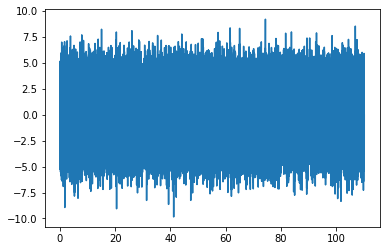

In [81]:
fig, ax = plt.subplots()
ax.plot(
    data['time'],
    data['response'],
)

Or zoom in on a short section, demonstrating that the actual sinusoid is difficult to see in the noise

(1.0, 2.0)

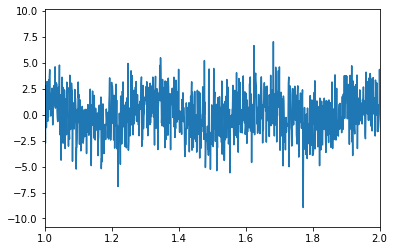

In [82]:
fig, ax = plt.subplots()
ax.plot(
    data['time'],
    data['response'],
)
ax.set_xlim(1,2)

But note that we defined our stimulus and times at a very high 1000 Hz sampling rate. Two-photon imaging samples at a much lower rate. To simulate this, let's downsample our response matrix at 30 Hz:

In [68]:
def downsample(input_df, sampling_frequency):
    from scipy.interpolate import interp1d
    sample_times = np.arange(input_df['time'].min(), input_df['time'].max(), 1/sampling_frequency)
    f = interp1d(input_df['time'], input_df['response'])
    return pd.DataFrame({'time': sample_times, 'response': f(sample_times)})

In [72]:
downsampled_data = downsample(data, sampling_frequency=30)
downsampled_data.head()

,time,response
0,0.000000,0.876598
1,0.033333,-1.490812
2,0.066667,0.208385
3,0.100000,-1.812727
4,0.133333,0.590674


If we were to look at events at regular intervals around event times spaced at the underlying frequency, we can see the sinusoid response relative to these events. This is equivalent to plotting each response of a neuron to a given sensory event.

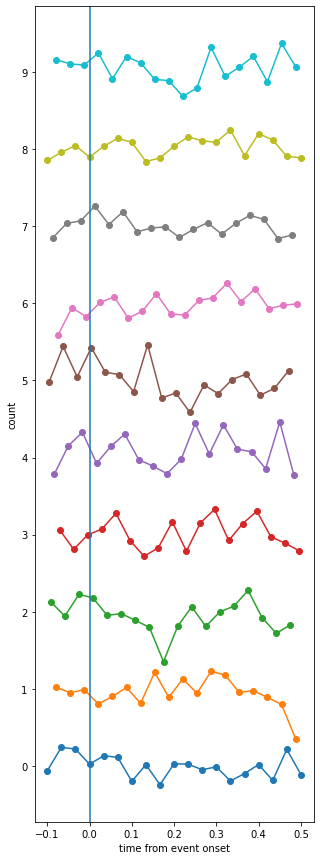

In [74]:
t_before = 0.1
t_after = 0.5
vertical_spacing = 10
n_events = 10
fig, ax = plt.subplots(figsize=(5,15))

events = np.arange(1,100, 1/f)

for event_count, event_time in enumerate(events[:n_events]):
    data_subset = downsampled_data.query('time >= @event_time - @t_before and time <= @event_time + @t_after')
    ax.plot(
        data_subset['time'] - event_time,
        data_subset['response'] + vertical_spacing*event_count,
        marker = 'o'
    )
ax.set_yticks(vertical_spacing*np.arange(0,n_events))
ax.set_yticklabels(np.arange(0,n_events))
ax.set_ylabel('count')
ax.set_xlabel('time from event onset')
ax.axvline(0)

The above plot highlights two problems:
1. Due to the noise and low sampling rate, the underlying sinusoid is not visible relative to any given event.
2. Also due to the fact that the sinusoid frequency is not locked to the sampling rate, the timestamps are not vertically aligned. This will make averaging difficult. This similar to the situation in neural recordings in which stimuli are not exactly locked to the 2P microscope frame sampling times.

To deal with #2, we will interpolate all responses onto a higher-frequency timebase relative to the event times. This won't recover information lost to the original downsampling, but it will allow us a common timebase on which we can average across events.

As part of the 'mindscope_utilities' package, we have provided a function that implements the second solution. Here's how it's used. We provide it with:
* the data we want to process as a tidy dataframe
* the names of the `t` and `y` columns
* the event times of interest
* the amount of time before and after each event that we wish to include
* the sampling rate of the common timebase on which we want to interpolate all values. This doesn't necessarily need to match our acquisition sampling rate.

In [78]:
etr = mindscope_utilities.event_triggered_response(
    downsampled_data,
    t = 'time',
    y = 'response',
    event_times = events,
    t_before = 0.1,
    t_after = 1,
    output_sampling_rate = 50
)

Then use seaborn to view the result
We're able to recover the sinusoid through averaging

<AxesSubplot:xlabel='time', ylabel='response'>

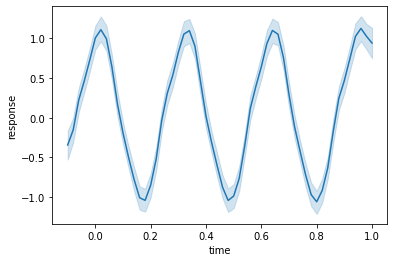

In [79]:
fig, ax = plt.subplots()
sns.lineplot(
    data = etr,
    x='time',
    y='response',
    ax=ax
)